# Work on the neurons

In [3]:
# Initialization
# 1. Get the relevant dependencies 
import json
import os
import sys 
import random
import math
import numpy as np
import pandas as pd
import inspect
import os.path
import matplotlib.pyplot as plt
import heapq
from math import atan2,pi

project_root = os.path.abspath(os.path.join('..'))
if project_root not in sys.path:
    sys.path.append(project_root)

print(project_root)

c:\Users\aurel\Documents\GitHub\Code_Thesis_GitHub\Code_Thesis_GitHub


In [4]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from event_model import event_model as em
from validator import validator_lite as vl
import data_analysis.event_generator as eg
from visual.color_map import Colormap


In [5]:
def load_event(file_name, plot_event=False):

    f = open(file_name)
    json_data_event = json.loads(f.read())

    ev = em.event(json_data_event, read_tracks=True)

    modules = ev.modules
    tracks = ev.real_tracks

    if plot_event:
        eg.plot_tracks_and_modules(tracks, modules, title="Loaded Event")

    modules_even = []
    modules_odd = []

    for i in range(len(modules)):
        if i % 2 == 0:
            modules_even.append(modules[i])
        else:
            modules_odd.append(modules[i])

    return json_data_event, modules

## 1. Max_neurons and total hits distributions

In [ ]:
def get_min_max_values(list):
    maximum = list[0]
    minimum = list[0]
    index_max = 0
    index_min = 0
    
    for i, n in enumerate(list):
        if n > maximum:
            maximum = n
            index_max = i

        if n < minimum:
            minimum = n
            index_min = i

    print('Maximum value and its index:', maximum,',',index_max)
    print('Minimum value and its index:',minimum,',',index_min)

### Minibias dataset

In [169]:
Json_data_all_events = []
all_tracks = []
all_events = [i for i in range(995)]
random.seed(40)
random.shuffle(all_events)

nr_events = 995
event_file_name = "/datasets/minibias/velo_event_"
file_name = project_root + event_file_name

list_max_neurons =  []
list_neurons_total = []
list_hits_total = []

for i in all_events[:nr_events]:
        #print("[INFO] Evaluate Event: %s" % file_name + str(i))
        size = os.path.getsize(file_name + str(i) + ".json")
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)

        modules_count = len(modules)
        hit_counts = [len(module.hits()) for module in modules]
        hits_total = sum(hit_counts)
        list_hits_total.append(hits_total)
        
        neuron_count = [
            hit_counts[i] * hit_counts[i + 1]
            for i in range(modules_count - 1)
            ]
        neurons_total = sum(neuron_count)
        list_neurons_total.append(neurons_total)

        max_neurons = max(neuron_count)
        list_max_neurons.append(max_neurons)

In [170]:
print('Total hits')
get_min_max_values(list_hits_total)

print('Total neurons')
get_min_max_values(list_neurons_total)

print('Max neurons in one layer')
get_min_max_values(list_max_neurons)

Total hits
Maximum value and its index: 6786 , 716
Minimum value and its index: 51 , 259
Total neurons
Maximum value and its index: 877500 , 716
Minimum value and its index: 48 , 259
Max neurons in one layer
Maximum value and its index: 22436 , 716
Minimum value and its index: 4 , 259


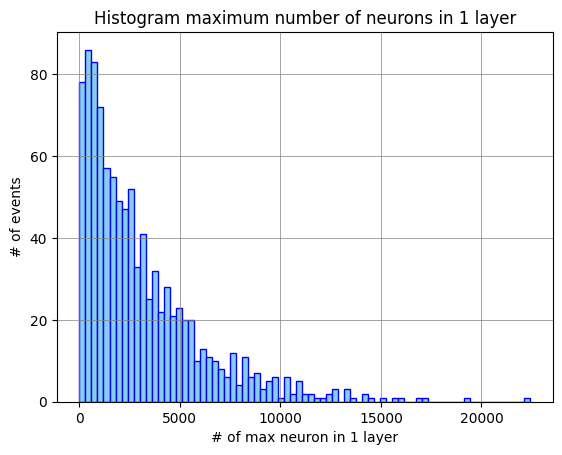

In [171]:
plt.hist(list_max_neurons,color = "skyblue", edgecolor='blue',bins=75)
plt.xlabel('# of max neuron in 1 layer')
plt.ylabel('# of events')
plt.grid(True, color='grey', linewidth=0.5)
plt.title('Histogram maximum number of neurons in 1 layer')
plt.savefig(f'neurons_analysis/Histogram_max_neurons_analysis_minibias.png')
plt.show()     

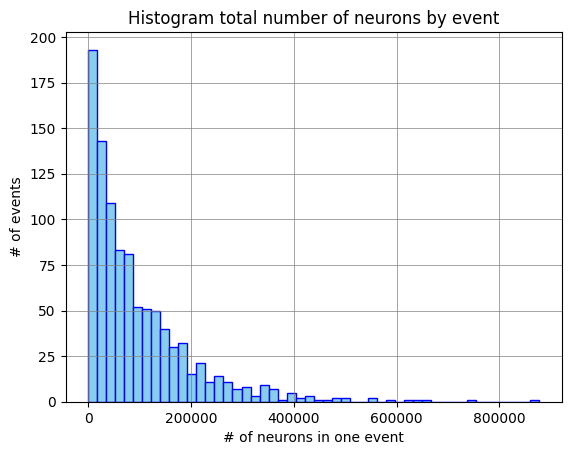

In [172]:
plt.hist(list_neurons_total,color = "skyblue", edgecolor='blue',bins=50)
plt.xlabel('# of neurons in one event')
plt.ylabel('# of events')
plt.grid(True, color='grey', linewidth=0.5)
plt.title('Histogram total number of neurons by event')
plt.savefig(f'neurons_analysis/Histogram_total_neurons_analysis_minibias.png')
plt.show()     

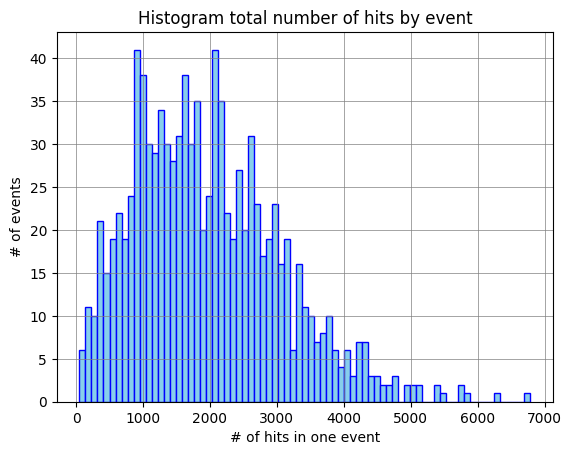

In [173]:
plt.hist(list_hits_total,color = "skyblue", edgecolor='blue',bins=75)
plt.xlabel('# of hits in one event')
plt.ylabel('# of events')
plt.grid(True, color='grey', linewidth=0.5)
plt.title('Histogram total number of hits by event')
plt.savefig(f'neurons_analysis/Histogram_total_hits_analysis_minibias.png')
plt.show()     

### Bsphiphi dataset

In [174]:
Json_data_all_events = []
all_tracks = []
all_events = [i for i in range(1000)]
random.seed(40)
random.shuffle(all_events)

nr_events = 1000
event_file_name = "/datasets/bsphiphi/velo_event_"
file_name = project_root + event_file_name

list_max_neurons =  []
list_neurons_total = []
list_hits_total = []

for i in all_events[:nr_events]:
        #print("[INFO] Evaluate Event: %s" % file_name + str(i))
        size = os.path.getsize(file_name + str(i) + ".json")
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)

        modules_count = len(modules)
        hit_counts = [len(module.hits()) for module in modules]
        hits_total = sum(hit_counts)
        list_hits_total.append(hits_total)
        
        neuron_count = [
            hit_counts[i] * hit_counts[i + 1]
            for i in range(modules_count - 1)
            ]
        neurons_total = sum(neuron_count)
        list_neurons_total.append(neurons_total)

        max_neurons = max(neuron_count)
        list_max_neurons.append(max_neurons)
        


In [175]:
print('Total hits')
get_min_max_values(list_hits_total)

print('Total neurons')
get_min_max_values(list_neurons_total)

print('Max neurons in one layer')
get_min_max_values(list_max_neurons)

Total hits
Maximum value and its index: 8666 , 602
Minimum value and its index: 336 , 317
Total neurons
Maximum value and its index: 1430500 , 602
Minimum value and its index: 2152 , 317
Max neurons in one layer
Maximum value and its index: 40145 , 602
Minimum value and its index: 90 , 366


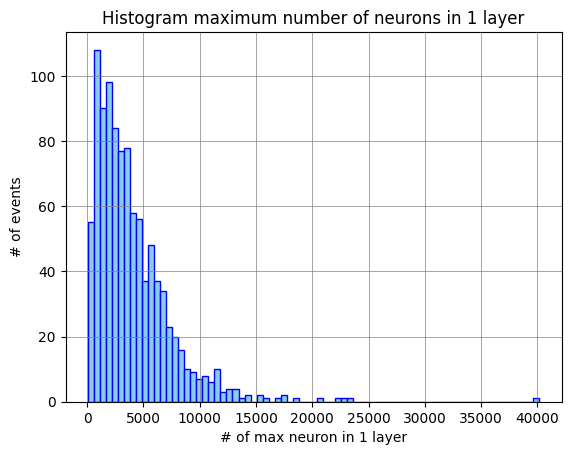

In [176]:
plt.hist(list_max_neurons,color = "skyblue", edgecolor='blue',bins=75)
plt.xlabel('# of max neuron in 1 layer')
plt.ylabel('# of events')
plt.grid(True, color='grey', linewidth=0.5)
plt.title('Histogram maximum number of neurons in 1 layer')
plt.savefig(f'neurons_analysis/Histogram_max_neurons_analysis_bsphiphi.png')
plt.show()    

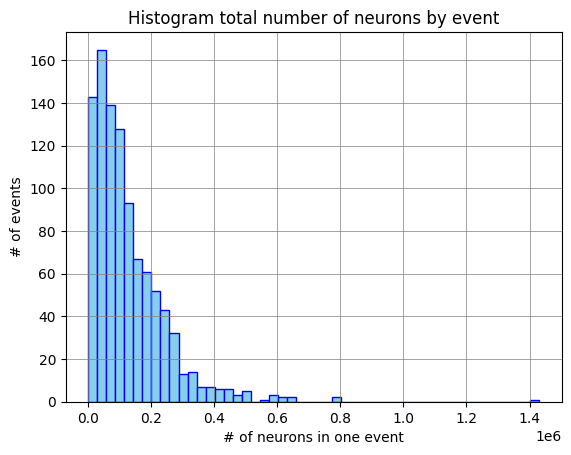

In [177]:
plt.hist(list_neurons_total,color = "skyblue", edgecolor='blue',bins=50)
plt.xlabel('# of neurons in one event')
plt.ylabel('# of events')
plt.grid(True, color='grey', linewidth=0.5)
plt.title('Histogram total number of neurons by event')
plt.savefig(f'neurons_analysis/Histogram_total_neurons_analysis_bsphiphi.png')
plt.show()     

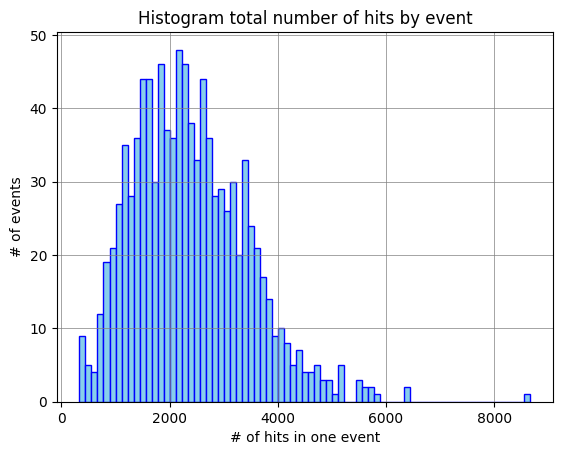

In [178]:
plt.hist(list_hits_total,color = "skyblue", edgecolor='blue',bins=75)
plt.xlabel('# of hits in one event')
plt.ylabel('# of events')
plt.grid(True, color='grey', linewidth=0.5)
plt.title('Histogram total number of hits by event')
plt.savefig(f'neurons_analysis/Histogram_total_hits_analysis_bsphiphi.png')
plt.show()   